In [48]:
import matplotlib.pyplot as plt

In [49]:
%run model.py

In [50]:
x = np.logspace(np.log10(0.08), 0, 1000)
y = disk_powlaw(x, 1)

In [51]:
from matplotlib.ticker import ScalarFormatter

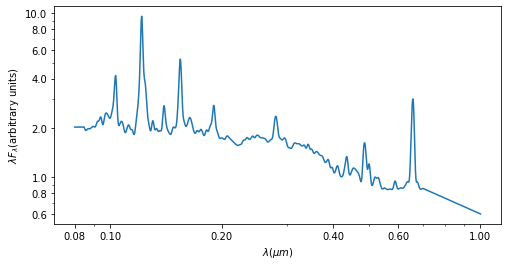

In [52]:
fig, ax = plt.subplots(figsize=(8,4))
ax.loglog(x, y)
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
plt.yticks([0.6,0.8,1.,2.,4.,6.,8.,10.])
plt.xticks([0.08,0.1,0.2,0.4,0.6,1.])
plt.xlabel(r"$\lambda(\mu m)$")
plt.ylabel(r"$\lambda F_\lambda$(arbitrary units)")

plt.savefig("/Users/wul/Documents/ustcthesis-master/figures/disk_pow.pdf")

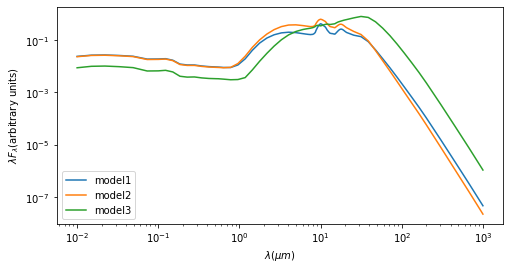

In [53]:
fig, ax = plt.subplots(figsize=(8,4))
ax.loglog(wav, m1, label="model1")
ax.loglog(wav, m2, label="model2")
ax.loglog(wav, m3, label="model3")
plt.legend(loc="lower left")
plt.xlabel(r"$\lambda(\mu m)$")
plt.ylabel(r"$\lambda F_\lambda$(arbitrary units)")

plt.savefig("/Users/wul/Documents/ustcthesis-master/figures/cold_dust.pdf")

In [54]:
%run ugriz.py

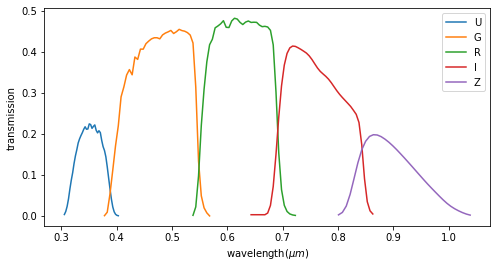

In [55]:
fig, ax = plt.subplots(figsize=(8,4))
for file in ["U","G","R","I","Z"]:
    data = np.loadtxt(f"../data/rsr/{file}")
    ax.plot(data[:,0]/1e4, data[:,1], label=file)
plt.xlabel(r"wavelength$(\mu m)$")
plt.ylabel("transmission")
plt.legend()
plt.savefig("/Users/wul/Documents/ustcthesis-master/figures/sdss_band.pdf")

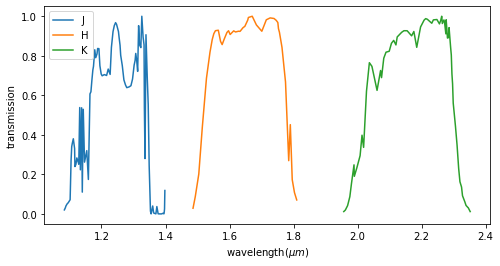

In [56]:
fig, ax = plt.subplots(figsize=(8,4))
for file in ["J","H","K"]:
    data = np.loadtxt(f"../data/rsr/{file}")
    ax.plot(data[:,0], data[:,1], label=file)
plt.xlabel(r"wavelength$(\mu m)$")
plt.ylabel("transmission")
plt.legend()
plt.savefig("/Users/wul/Documents/ustcthesis-master/figures/2mass_band.pdf")

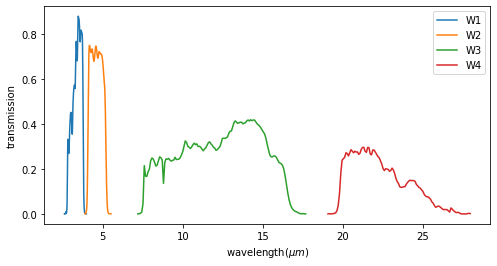

In [57]:
fig, ax = plt.subplots(figsize=(8,4))
for file in ["W1","W2","W3","W4"]:
    data = np.loadtxt(f"../data/rsr/{file}")
    ax.plot(data[:,0], data[:,1], label=file)
plt.xlabel(r"wavelength$(\mu m)$")
plt.ylabel("transmission")
plt.legend()
plt.savefig("/Users/wul/Documents/ustcthesis-master/figures/wise_band.pdf")

In [58]:
from model import *
from data import *
from analysis import *

In [59]:
oiii = for_oiii()
oiii_res = np.loadtxt("../output/oiii.res")
hb = for_hb()
hb_res = np.loadtxt("../output/hb.res")
mgii = for_mgii()
mgii_res = np.loadtxt("../output/mgii.res")

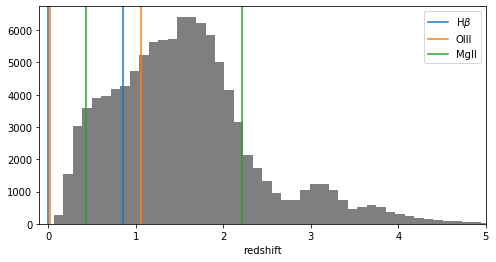

In [60]:
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(data["z_hw"], bins=50, color="tab:grey")
ax.axvline(x=0., c="tab:blue", label=r"H$\beta$")
ax.axvline(x=0.851, c="tab:blue")
ax.axvline(x=0.02, c="tab:orange", label="OIII")
ax.axvline(x=1.062, c="tab:orange")
ax.axvline(x=0.429, c="tab:green", label="MgII")
ax.axvline(x=2.215, c="tab:green")
plt.legend(loc="upper right")
plt.xlim(-0.1, 5)
plt.xlabel("redshift")
plt.savefig("/Users/wul/Documents/ustcthesis-master/figures/redshift.pdf")

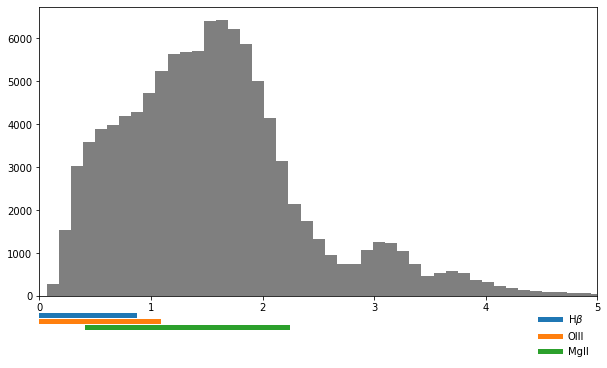

In [61]:
fig = plt.figure(constrained_layout=True, figsize=(10,6))
spec = fig.add_gridspec(ncols=1, nrows=2, height_ratios=[10,1])

ax1 = fig.add_subplot(spec[0])
ax1.hist(data["z_hw"], bins=50, color="tab:grey")
ax1.set_xlim((0,5))

ax2 = fig.add_subplot(spec[1])
ax2.axis("off")
ax2.plot([0, 0.851],[2,2],linewidth=5, label=r"H$\beta$")
ax2.plot([0, 1.062],[1,1],linewidth=5, label="OIII")
ax2.plot([0.429, 2.215],[0,0], linewidth=5, label="MgII")
ax2.set_xlim((0,5))
ax2.set_ylim((-1,4))

ax2.legend().get_frame().set_linewidth(0.0)
plt.subplots_adjust(hspace=0.05)

plt.savefig("/Users/wul/Documents/ustcthesis-master/figures/redshift.pdf")

In [62]:
len(data)

105783

(array([7.000e+00, 1.800e+01, 9.000e+01, 2.860e+02, 1.087e+03, 2.382e+03,
        3.361e+03, 3.989e+03, 5.429e+03, 7.278e+03, 8.607e+03, 7.628e+03,
        5.158e+03, 2.691e+03, 1.166e+03, 4.270e+02, 1.230e+02, 4.000e+01,
        7.000e+00, 2.000e+00]),
 array([44.47971154, 44.66522657, 44.8507416 , 45.03625663, 45.22177166,
        45.40728669, 45.59280172, 45.77831675, 45.96383178, 46.14934681,
        46.33486184, 46.52037687, 46.7058919 , 46.89140693, 47.07692196,
        47.26243699, 47.44795202, 47.63346705, 47.81898208, 48.00449711,
        48.19001214]),
 <a list of 20 Patch objects>)

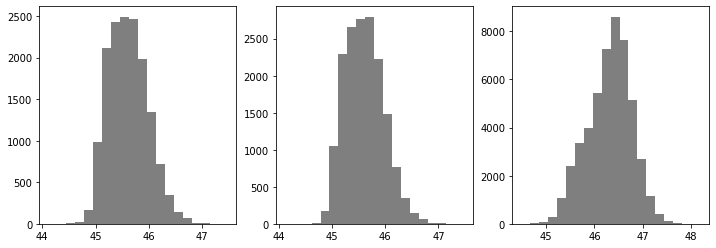

In [63]:
fig, axs = plt.subplots(1, 3, figsize=(12,4))
axs[0].hist(hb["loglbol"], bins=20, color="tab:gray")
axs[1].hist(oiii["loglbol"], bins=20, color="tab:gray")
axs[2].hist(mgii["loglbol"], bins=20, color="tab:gray")

In [64]:
hb_ = hb[hb["loglbol"] > 46]
oiii_ = oiii[oiii["loglbol"] > 46]
mgii_t = mgii[mgii["loglbol"] > 46.5]
mgii_res = mgii_res[mgii_t["loglbol"] > 47]
mgii_ = mgii_t[mgii_t["loglbol"] > 47]

In [65]:
print(len(hb_),len(hb_res))
print(len(oiii_),len(oiii_res))
print(len(mgii_),len(mgii_res))

2288 2288
2437 2437
2641 2641


In [66]:
hb_res[0][-2]

13.831169533560555

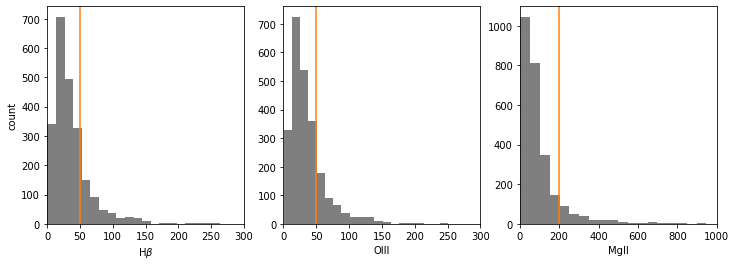

In [67]:
fig, axs = plt.subplots(1, 3, figsize=(12,4))

hb_tmp = hb_res[:,-2][hb_res[:,-2]<300]
axs[0].hist(hb_tmp, bins=20, color="tab:gray")
axs[0].set_xlim((0,300))
axs[0].axvline(x=50, c="tab:orange")
axs[0].set_xlabel(r"H$\beta$")
axs[0].set_ylabel("count")

oiii_tmp = oiii_res[:,-2][oiii_res[:,-2]<300]
axs[1].hist(oiii_tmp, bins=20, color="tab:gray")
axs[1].set_xlim((0,300))
axs[1].axvline(x=50, c="tab:orange")
axs[1].set_xlabel("OIII")

mgii_tmp = mgii_res[:,-2][mgii_res[:,-2]<1000]
axs[2].hist(mgii_tmp, bins=20, color="tab:gray")
axs[2].set_xlim((0,1000))
axs[2].axvline(x=200, c="tab:orange")
axs[2].set_xlabel("MgII")
plt.savefig("/Users/wul/Documents/ustcthesis-master/figures/chi_square.pdf")

In [68]:
print(np.mean(hb_res[:,-2]), np.median(hb_res[:,-2]))
print(np.mean(oiii_res[:,-2]), np.median(oiii_res[:,-2]))
print(np.mean(mgii_res[:,-2]), np.median(mgii_res[:,-2]))

43.994575917443 28.944664981186985
43.12368306362256 28.867028665606934
108.7100905183525 65.55041644746699


In [69]:
%run model.py

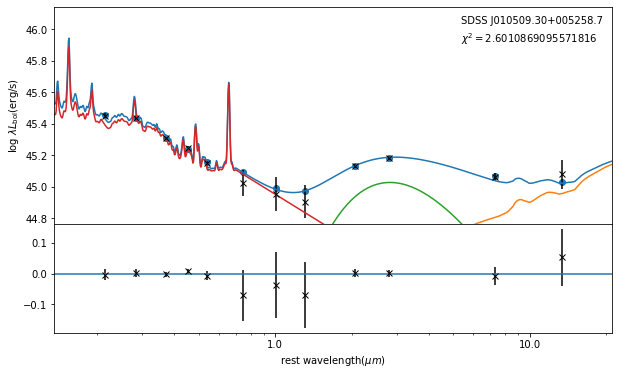

In [70]:
show_for_paper(hb_[40], hb_res[40])
plt.savefig("/Users/wul/Documents/ustcthesis-master/figures/example1.pdf")

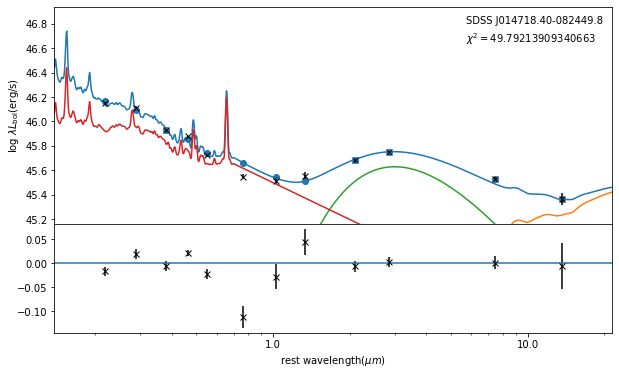

In [71]:
show_for_paper(oiii_[70], oiii_res[70])
plt.savefig("/Users/wul/Documents/ustcthesis-master/figures/example2.pdf")

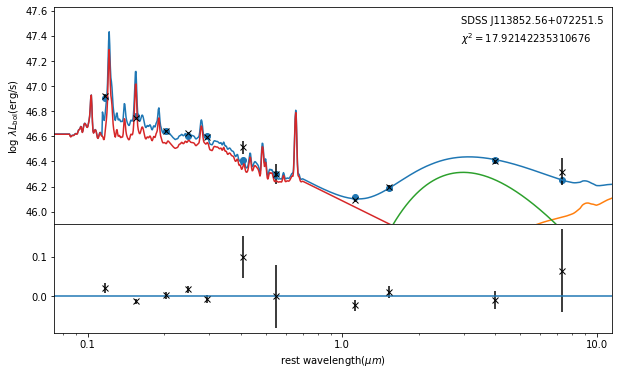

In [72]:
show_for_paper(mgii_[1110], mgii_res[1110])
plt.savefig("/Users/wul/Documents/ustcthesis-master/figures/example3.pdf")

In [73]:
cond = hb_res[:,-2]>150
hb_tmp = hb_[cond]
hb_res_tmp = hb_res[cond]

In [74]:
len(hb_tmp)

32

In [75]:
lam = lambda x: show_for_paper(hb_tmp[x], hb_res_tmp[x])

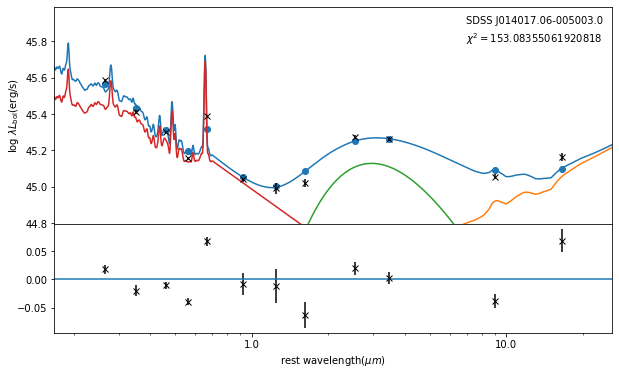

In [76]:
lam(1)
plt.savefig("/Users/wul/Documents/ustcthesis-master/figures/abnormal1.pdf")

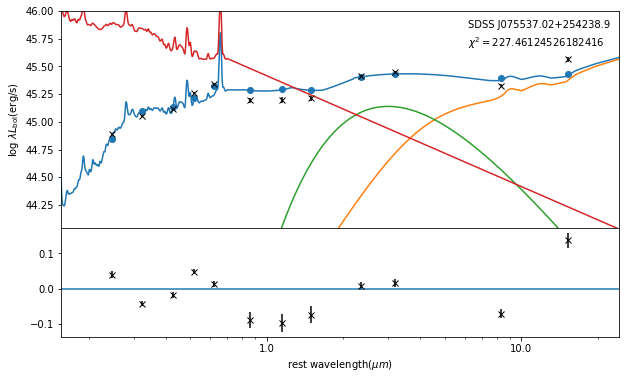

In [77]:
lam(2)
plt.savefig("/Users/wul/Documents/ustcthesis-master/figures/abnormal2.pdf")

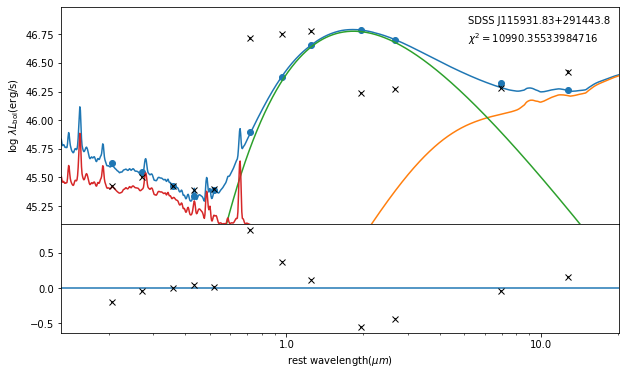

In [78]:
lam(8)
plt.savefig("/Users/wul/Documents/ustcthesis-master/figures/abnormal3.pdf")

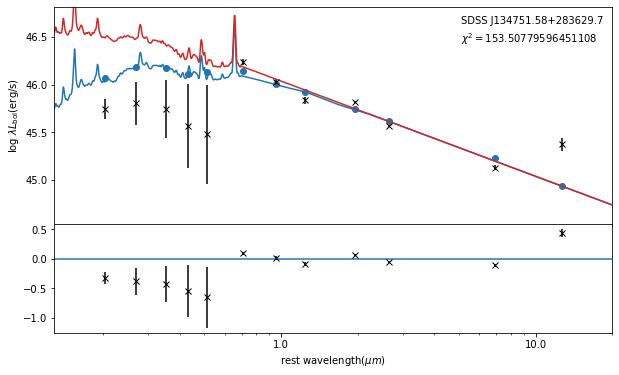

In [79]:
lam(14)
plt.savefig("/Users/wul/Documents/ustcthesis-master/figures/abnormal4.pdf")

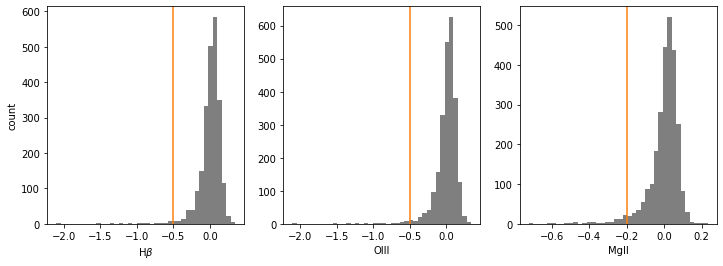

In [80]:
fig, axs = plt.subplots(1, 3, figsize=(12,4))

hb_tmp = hb_res[:,3][hb_res[:,3]<300]
axs[0].hist(hb_tmp, bins=40, color="tab:gray")
# axs[0].set_xlim((0,300))
axs[0].axvline(x=-0.5, c="tab:orange")
axs[0].set_xlabel(r"H$\beta$")
axs[0].set_ylabel("count")

oiii_tmp = oiii_res[:,3][oiii_res[:,3]<300]
axs[1].hist(oiii_tmp, bins=40, color="tab:gray")
# axs[1].set_xlim((0,300))
axs[1].axvline(x=-0.5, c="tab:orange")
axs[1].set_xlabel("OIII")

mgii_tmp = mgii_res[:,3][mgii_res[:,3]<1000]
axs[2].hist(mgii_tmp, bins=40, color="tab:gray")
# axs[2].set_xlim((0,1000))
axs[2].axvline(x=-0.2, c="tab:orange")
axs[2].set_xlabel("MgII")
plt.savefig("/Users/wul/Documents/ustcthesis-master/figures/av.pdf")

In [81]:
cond_hb = (hb_res[:,3] > -0.5) & (hb_res[:,-2] < 50)
hb_ = hb_[cond_hb]
hb_res = hb_res[cond_hb]

cond_oiii = (oiii_res[:,3] > -0.5) & (oiii_res[:,-2] < 50)
oiii_ = oiii_[cond_oiii]
oiii_res = oiii_res[cond_oiii]

cond_mgii = (mgii_res[:,3] > -0.2) & (mgii_res[:,-2] < 200)
mgii_ = mgii_[cond_mgii]
mgii_res = mgii_res[cond_mgii]

In [84]:
len(hb_)

1794

(46, 47.3)

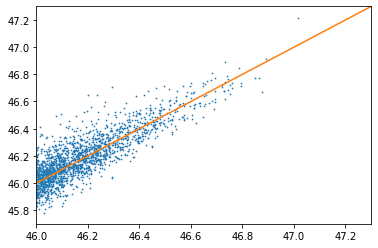

In [85]:
plt.scatter(hb_["loglbol"], np.log10(5) + disk_powlaw_(np.log10(0.3)) + hb_res[:,0], s=0.5)
plt.plot([46,47.3],[46,47.3], c="tab:orange")
plt.ylim((45.7,47.3))
plt.xlim((46,47.3))

(46, 47)

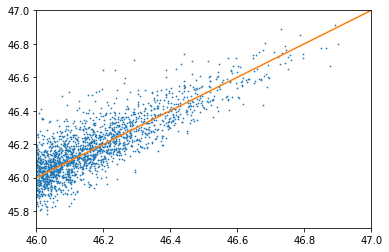

In [37]:
plt.scatter(oiii_["loglbol"], np.log10(5) + disk_powlaw_(np.log10(0.3)) + oiii_res[:,0], s=0.5)
plt.plot([46,47],[46,47], c="tab:orange")
plt.ylim((45.7,47))
plt.xlim((46,47))

(46.5, 48.2)

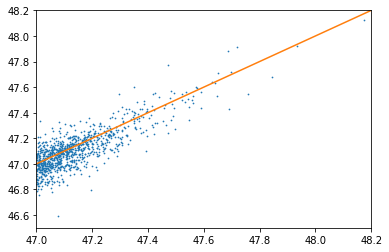

In [38]:
plt.scatter(mgii_["loglbol"], np.log10(5) + disk_powlaw_(np.log10(0.3)) + mgii_res[:,0], s=0.5)
plt.plot([47,48.2],[47,48.2], c="tab:orange")
plt.xlim((47, 48.2))
plt.ylim((46.5, 48.2))

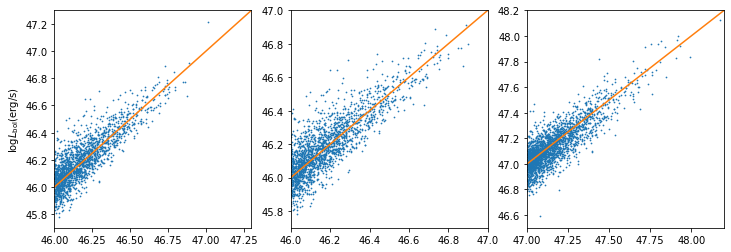

In [86]:
fig, axs = plt.subplots(1, 3, figsize=(12,4))

axs[0].scatter(hb_["loglbol"], np.log10(5) + disk_powlaw_(np.log10(0.3)) + hb_res[:,0], s=0.5)
axs[0].plot([46,47.3],[46,47.3], c="tab:orange")
axs[0].set_ylim((45.7,47.3))
axs[0].set_xlim((46,47.3))
axs[0].set_ylabel(r"log$L_{\mathrm{bol}}$(erg/s)")

axs[1].scatter(oiii_["loglbol"], np.log10(5) + disk_powlaw_(np.log10(0.3)) + oiii_res[:,0], s=0.5)
axs[1].plot([46,47],[46,47], c="tab:orange")
axs[1].set_ylim((45.7,47))
axs[1].set_xlim((46,47))

axs[2].scatter(mgii_["loglbol"], np.log10(5) + disk_powlaw_(np.log10(0.3)) + mgii_res[:,0], s=0.5)
axs[2].plot([47,48.2],[47,48.2], c="tab:orange")
axs[2].set_xlim((47, 48.2))
axs[2].set_ylim((46.5, 48.2))

plt.savefig("/Users/wul/Documents/ustcthesis-master/figures/lbol.pdf")

In [87]:
hb_loglbol = np.log10(5) + disk_powlaw_(np.log10(0.3)) + hb_res[:,0]
oiii_loglbol = np.log10(5) + disk_powlaw_(np.log10(0.3)) + oiii_res[:,0]
mgii_loglbol = np.log10(5) + disk_powlaw_(np.log10(0.3)) + mgii_res[:,0]

In [41]:
%run analysis.py

In [88]:
# hb_ans = np.array([analysis(i) for i in hb_res])
# oiii_ans = np.array([analysis(i) for i in oiii_res])
mgii_ans = np.array([analysis(i) for i in mgii_res])

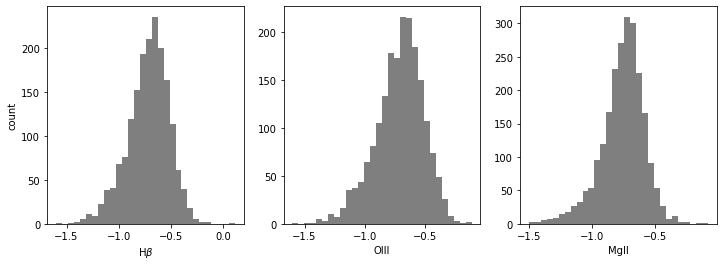

In [89]:
fig, axs = plt.subplots(1, 3, figsize=(12,4))
axs[0].hist(hb_ans[:,2], bins=30, color="tab:gray")
axs[0].set_xlabel(r"H$\beta$")
axs[0].set_ylabel("count")

axs[1].hist(oiii_ans[:,2], bins=30, color="tab:gray")
axs[1].set_xlabel("OIII")

axs[2].hist(mgii_ans[:,2], bins=30, color="tab:gray")
axs[2].set_xlabel("MgII")

plt.savefig("/Users/wul/Documents/ustcthesis-master/figures/cf.pdf")

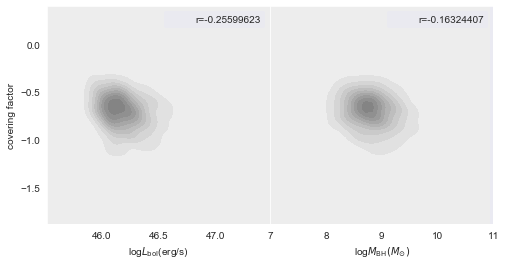

In [97]:
fig, axs = plt.subplots(1, 2, figsize=(8,4))

# axs[0].scatter(hb_loglbol, hb_ans[:,-1], s=0.1)
sb.kdeplot(hb_loglbol, hb_ans[:,-1], ax=axs[0], shade=True, cut=5, color="tab:gray")
axs[0].plot([],[],' ',label="r=-0.25599623")
axs[0].set_xticks([46,46.5,47])
axs[0].set_xlabel(r"log$L_{\mathrm{bol}}$(erg/s)")
axs[0].set_ylabel("covering factor")
axs[0].legend().get_frame().set_linewidth(0.0)

# axs[1].scatter(hb_["LOGBH_HB_VP06"], hb_ans[:,-1],s=0.1)
sb.kdeplot(hb_["LOGBH_HB_VP06"], hb_ans[:,-1], ax=axs[1], shade=True, cut=5, color="tab:gray")
axs[1].plot([],[],' ',label="r=-0.16324407")
axs[1].set_xlim((7,11))
axs[1].set_yticks([])
axs[1].set_xlabel(r"log$M_{\mathrm{BH}}(M_{\odot})$")
axs[1].legend().get_frame().set_linewidth(0.0)
plt.subplots_adjust(wspace=0)

plt.savefig("/Users/wul/Documents/ustcthesis-master/figures/cor_lbol_bh.pdf")

In [354]:
np.corrcoef(hb_loglbol, hb_ans[:,-1])

array([[ 1.        , -0.25599623],
       [-0.25599623,  1.        ]])

In [355]:
np.corrcoef(hb_["LOGBH_HB_VP06"], hb_ans[:,-1])

array([[ 1.        , -0.16324407],
       [-0.16324407,  1.        ]])

In [351]:
np.corrcoef(hb_["LOGBH_HB_VP06"], hb_loglbol)

array([[1.        , 0.20505286],
       [0.20505286, 1.        ]])

In [162]:
import pickle

In [163]:
f = open("../res/mgii.bfsim", "wb")
pickle.dump({
    "data": mgii_,
    "res": mgii_res,
    "ans": mgii_ans
},f)
f.close()

In [400]:
parcor([np.log10(hb_["ew_broad_hb"]), hb_ans[:,-1], hb_loglbol, hb_["logbh_hb_vp06"]])[0,1]

0.05592135325955595

In [401]:
parcor([np.log10(hb_["ew_narrow_hb"]), hb_ans[:,-1], hb_loglbol, hb_["logbh_hb_vp06"]])[0,1]

0.09290080720836343

In [402]:
parcor([np.log10(oiii_["ew_oiii_5007"]), oiii_ans[:,-1], oiii_loglbol, oiii_["logbh_hb_vp06"]])[0,1]

-0.14183453510214006

In [90]:
parcor([np.log10(mgii_["ew_mgii"]), mgii_ans[:,-1], mgii_loglbol, mgii_["logbh_mgii_vo09"]])[0,1]

0.1947811270951299

In [92]:
import seaborn as sb
sb.set_style("dark")

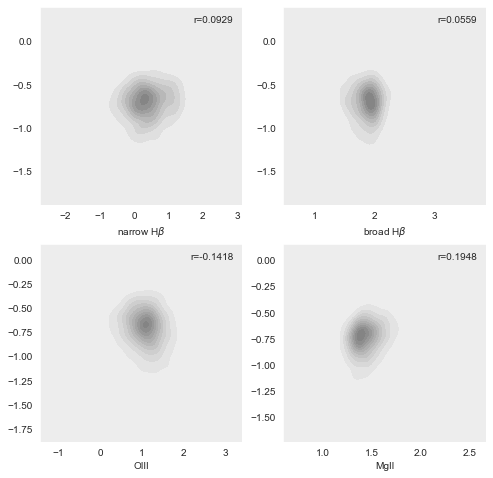

In [98]:
fig, axs = plt.subplots(2, 2, figsize=(8,8))

sb.kdeplot(np.log10(hb_["ew_narrow_hb"]), hb_ans[:,-1], ax=axs[0,0], shade=True, cut=5, color="tab:gray")
axs[0,0].set_xlabel(r"narrow H$\beta$")
axs[0,0].plot([],[],' ',label="r=0.0929")
axs[0,0].legend(framealpha=0).get_frame().set_linewidth(0.0)

sb.kdeplot(np.log10(hb_["ew_broad_hb"]), hb_ans[:,-1], ax=axs[0,1], shade=True, cut=5, color="tab:gray")
axs[0,1].set_xlabel(r"broad H$\beta$")
axs[0,1].plot([],[],' ',label="r=0.0559")
axs[0,1].legend(framealpha=0).get_frame().set_linewidth(0.0)

sb.kdeplot(np.log10(oiii_["ew_oiii_5007"]), oiii_ans[:,-1], ax=axs[1,0], shade=True, cut=5, color="tab:gray")
axs[1,0].set_xlabel("OIII")
axs[1,0].plot([],[],' ',label="r=-0.1418")
axs[1,0].legend(framealpha=0).get_frame().set_linewidth(0.0)

sb.kdeplot(np.log10(mgii_["ew_mgii"]), mgii_ans[:,-1], ax=axs[1,1], shade=True, cut=5, color="tab:gray")
axs[1,1].set_xlabel("MgII")
axs[1,1].plot([],[],' ',label="r=0.1948")
axs[1,1].legend(framealpha=0).get_frame().set_linewidth(0.0)

# plt.savefig("/Users/wul/Desktop/tmp.pdf")

plt.savefig("/Users/wul/Documents/ustcthesis-master/figures/ew-cf.pdf")

In [121]:
oiii_ans_ = np.array([analysis_(i) for i in oiii_res])
mgii_ans_ = np.array([analysis_(i) for i in mgii_res])
hb_ans_ = np.array([analysis_(i) for i in hb_res])

In [156]:
x = np.linspace(1,10)

In [122]:
mgii_cors = [parcor([np.log10(mgii_["ew_mgii"]), mgii_ans_[:,i], mgii_loglbol, mgii_["logbh_mgii_vo09"]])[0,1] 
for i in range(len(mgii_ans_[0,:]))]

oiii_cors = [parcor([np.log10(oiii_["ew_oiii_5007"]), oiii_ans_[:,i], oiii_loglbol, oiii_["logbh_hb_vp06"]])[0,1]
for i in range(len(oiii_ans_[0,:]))]

hb_broad_cors = [parcor([np.log10(hb_["ew_broad_hb"]), hb_ans_[:,i], hb_loglbol, hb_["logbh_hb_vp06"]])[0,1]
for i in range(len(hb_ans_[0,:]))]

hb_narrow_cors = [parcor([np.log10(hb_["ew_narrow_hb"]), hb_ans_[:,i], hb_loglbol, hb_["logbh_hb_vp06"]])[0,1]
for i in range(len(hb_ans_[0,:]))]

In [150]:
mgii_cors_err = [
    np.std([
        parcor(resample(np.log10(mgii_["ew_mgii"]), mgii_ans_[:,i], mgii_loglbol, mgii_["logbh_mgii_vo09"]))[0,1]
        for j in range(1000)
    ])
    for i in range(len(mgii_ans_[0,:]))
]

In [169]:
oiii_cors_err = [
    np.std([
        parcor(resample(np.log10(oiii_["ew_oiii_5007"]), oiii_ans_[:,i], oiii_loglbol, oiii_["logbh_hb_vp06"]))[0,1]
        for j in range(1000)
    ])
    for i in range(len(oiii_ans_[0,:]))
]

hb_broad_cors_err = [
    np.std([
        parcor(resample(np.log10(hb_["ew_broad_hb"]), hb_ans_[:,i], hb_loglbol, hb_["logbh_hb_vp06"]))[0,1]
        for j in range(1000)
    ])
    for i in range(len(oiii_ans_[0,:]))
]

hb_narrow_cors_err = [
    np.std([
        parcor(resample(np.log10(hb_["ew_narrow_hb"]), hb_ans_[:,i], hb_loglbol, hb_["logbh_hb_vp06"]))[0,1]
        for j in range(1000)
    ])
    for i in range(len(oiii_ans_[0,:]))
]

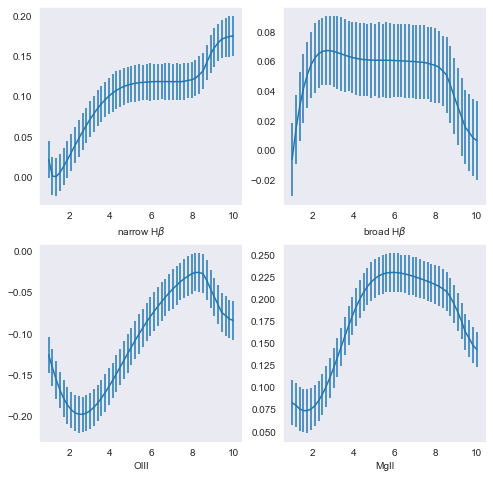

In [174]:
fig, axs = plt.subplots(2, 2, figsize=(8,8))

axs[0,0].errorbar(x, hb_narrow_cors, yerr=hb_narrow_cors_err)
axs[0,0].set_xlabel(r"narrow H$\beta$")

axs[0,1].errorbar(x, hb_broad_cors, yerr=hb_broad_cors_err)
axs[0,1].set_xlabel(r"broad H$\beta$")

axs[1,0].errorbar(x, oiii_cors, yerr=oiii_cors_err)
axs[1,0].set_xlabel("OIII")

axs[1,1].errorbar(x, mgii_cors, yerr=mgii_cors_err)
axs[1,1].set_xlabel("MgII")

# plt.savefig("/Users/wul/Desktop/tmp.pdf")

plt.savefig("/Users/wul/Documents/ustcthesis-master/figures/cors.pdf")

In [232]:
# mgii_sim = np.loadtxt("../output/mgii.sim")[:,:-1]
# mgii_sim_logew = np.loadtxt("../output/mgii.sim")[:,-1]

oiii_sim = np.loadtxt("../output/oiii1.sim")[:,:-1]
oiii_sim_logew = np.loadtxt("../output/oiii1.sim")[:,-1]

# hb_sim = np.loadtxt("../output/hb.sim")[:,:-1]
# hb_sim_logew = np.loadtxt("../output/hb.sim")[:,-1]

In [233]:
# mgii_sim_ans_ = np.array([analysis_(i) for i in mgii_sim])
oiii_sim_ans_ = np.array([analysis_(i) for i in oiii_sim])
# hb_sim_ans_ = np.array([analysis_(i) for i in hb_sim])

In [234]:
# mgii_sim_ans = np.array([analysis(i) for i in mgii_sim])
oiii_sim_ans = np.array([analysis(i) for i in oiii_sim])
# hb_sim_ans = np.array([analysis(i) for i in hb_sim])

In [202]:
parcor([mgii_sim_logew, mgii_sim_ans[:,-1], mgii_loglbol, mgii_["logbh_mgii_vo09"]])[0,1]

0.1723733323323319

In [229]:
np.corrcoef([mgii_sim_logew, mgii_sim_ans[:,-1], mgii_loglbol, mgii_["logbh_mgii_vo09"]])

array([[ 1.        ,  0.19273185, -0.1181047 , -0.04586411],
       [ 0.19273185,  1.        , -0.20443926, -0.07710847],
       [-0.1181047 , -0.20443926,  1.        ,  0.15461743],
       [-0.04586411, -0.07710847,  0.15461743,  1.        ]])

In [235]:
parcor([oiii_sim_logew, oiii_sim_ans[:,-1], oiii_loglbol, oiii_["logbh_hb_vp06"]])[0,1]

-0.16921535999435175

In [228]:
np.corrcoef([oiii_sim_logew, oiii_sim_ans[:,-1], oiii_loglbol, oiii_["logbh_hb_vp06"]])

array([[ 1.        , -0.24987616, -0.00120878,  0.11496552],
       [-0.24987616,  1.        , -0.28461778, -0.0433201 ],
       [-0.00120878, -0.28461778,  1.        ,  0.14208633],
       [ 0.11496552, -0.0433201 ,  0.14208633,  1.        ]])

In [204]:
parcor([hb_sim_logew, hb_sim_ans[:,-1], hb_loglbol, hb_["logbh_hb_vp06"]])[0,1]

-0.14028180565001724

In [230]:
np.corrcoef([hb_sim_logew, hb_sim_ans[:,-1], hb_loglbol, hb_["logbh_hb_vp06"]])

array([[ 1.        , -0.17748371,  0.12608104,  0.13005945],
       [-0.17748371,  1.        , -0.25761868, -0.16560776],
       [ 0.12608104, -0.25761868,  1.        ,  0.20505286],
       [ 0.13005945, -0.16560776,  0.20505286,  1.        ]])

In [196]:
# mgii_sim_cors = [parcor([mgii_sim_logew, mgii_sim_ans_[:,i], mgii_loglbol, mgii_["logbh_mgii_vo09"]])[0,1] 
# for i in range(len(mgii_sim_ans_[0,:]))]

oiii_sim_cors = [parcor([oiii_sim_logew, oiii_sim_ans_[:,i], oiii_loglbol, oiii_["logbh_hb_vp06"]])[0,1] 
for i in range(len(oiii_sim_ans_[0,:]))]

# hb_sim_cors = [parcor([hb_sim_logew, hb_sim_ans_[:,i], hb_loglbol, hb_["logbh_hb_vp06"]])[0,1] 
# for i in range(len(hb_sim_ans_[0,:]))]

In [199]:
mgii_sim_cors_err = [
    np.std([
        parcor(resample(mgii_sim_logew, mgii_sim_ans_[:,i], mgii_loglbol, mgii_["logbh_mgii_vo09"]))[0,1]
        for j in range(1000)
    ])
    for i in range(len(mgii_ans_[0,:]))
]

oiii_sim_cors_err = [
    np.std([
        parcor(resample(oiii_sim_logew, oiii_sim_ans_[:,i], oiii_loglbol, oiii_["logbh_hb_vp06"]))[0,1]
        for j in range(1000)
    ])
    for i in range(len(oiii_ans_[0,:]))
]

hb_sim_cors_err = [
    np.std([
        parcor(resample(hb_sim_logew, hb_sim_ans_[:,i], hb_loglbol, hb_["logbh_hb_vp06"]))[0,1]
        for j in range(1000)
    ])
    for i in range(len(oiii_ans_[0,:]))
]

<ErrorbarContainer object of 3 artists>

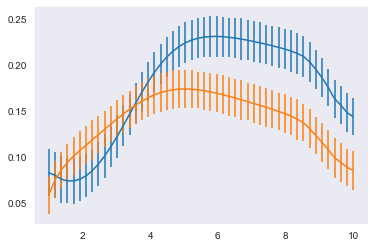

In [201]:
plt.errorbar(x, mgii_cors, yerr=mgii_cors_err)
plt.errorbar(x, mgii_sim_cors, yerr=mgii_sim_cors_err)

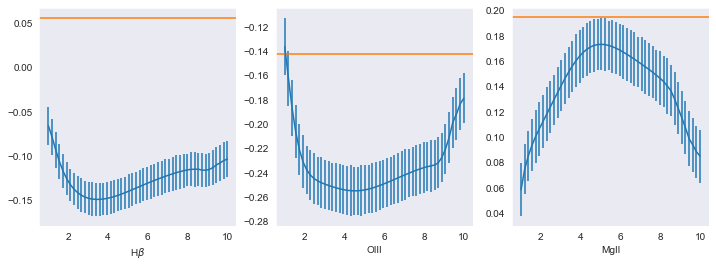

In [214]:
fig, axs = plt.subplots(1, 3, figsize=(12,4))

axs[0].errorbar(x, hb_sim_cors, yerr=hb_sim_cors_err)
axs[0].axhline(y=0.05592135325955595, color="tab:orange")
axs[0].set_xlabel(r"H$\beta$")

axs[1].errorbar(x, oiii_sim_cors, yerr=oiii_sim_cors_err)
axs[1].axhline(y=-0.14183453510214006, color="tab:orange")
axs[1].set_xlabel("OIII")

axs[2].errorbar(x, mgii_sim_cors, yerr=mgii_sim_cors_err)
axs[2].axhline(y=0.1947811270951299, color="tab:orange")
axs[2].set_xlabel("MgII")


# plt.savefig("/Users/wul/Desktop/tmp.pdf")

plt.savefig("/Users/wul/Documents/ustcthesis-master/figures/sim.pdf")

In [219]:
oiii_ans[0][0]

46.41370591995779